In [2]:
import os
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('data')
data_root = 'data/My Drive'


#time serie
filename = os.path.join(data_root,'international-airline-passengers.csv')
dataframe = pd.read_csv(filename,usecols=[1],header=0)
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset = dataset[:-1] #eliminate nan from the last element

#mnist
data_root = 'data/My Drive'
mnist_home = os.path.join(data_root, 'mnist')
mnist = input_data.read_data_sets(mnist_home, one_hot=True)

Mounted at data
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/My Drive/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/My Drive/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/My Drive/mnist/t10k-images-idx3-ubyte.gz
Extracting data/My Drive/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers.recurrent import SimpleRNN
from keras.optimizers import RMSprop
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
X_train = mnist.train.images
X_test = mnist.test.images
Y_train = mnist.train.labels
Y_test = mnist.test.labels
n_classes = 10
n_classes = 10
X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)

In [5]:
model = Sequential()
model.add(SimpleRNN(units=16, activation='relu', input_shape=(28,28)))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.01),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 16)                720       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 890
Trainable params: 890
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(X_train, Y_train, batch_size=100, epochs=20)
score = model.evaluate(X_test, Y_test)
print('\nTest loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
55000/55000 [==============================] - 13s 238us/step - loss: 1.3343 - acc: 0.4868
Epoch 2/20
55000/55000 [==============================] - 10s 188us/step - loss: 0.9521 - acc: 0.6666
Epoch 3/20
55000/55000 [==============================] - 10s 188us/step - loss: 0.8044 - acc: 0.7304
Epoch 4/20
55000/55000 [==============================] - 10s 191us/step - loss: 0.7386 - acc: 0.7589
Epoch 5/20
55000/55000 [==============================] - 10s 190us/step - loss: 0.6632 - acc: 0.7845
Epoch 6/20
55000/55000 [==============================] - 11s 192us/step - loss: 0.6289 - acc: 0.8004
Epoch 7/20
55000/55000 [==============================] - 11s 191us/step - loss: 0.5843 - acc: 0.8132
Epoch 8/20
55000/55000 [==============================] - 10s 189us/step - loss: 0.5744 - acc: 0.8233
Epoch 9/20
55000/55000 [==============================] - 10s 189us/step - loss: 0.5564 - acc: 0.8316
Epoch 10/20
55000/55000 [==============================] - 10s 188us/step - loss: 

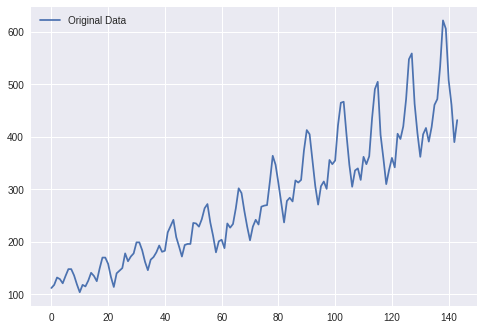

In [7]:
import matplotlib.pyplot as plt
plt.plot(dataset,label='Original Data')
plt.legend()
plt.show()

In [17]:
#np.sum(dataset==np.nan)
np.isfinite(dataset).all()
#dataset[-1]

True

In [0]:
import sklearn.preprocessing as skpp
scaler = skpp.MinMaxScaler(feature_range=(0,1))
dataset = dataset.astype('float32')
normalized_dataset = scaler.fit_transform(dataset)

In [0]:
def ts_train_test_split(dataset, train_size=0.9):
  train_examples = int(dataset.shape[0] * train_size)
  return dataset[:train_examples], dataset[train_examples:]

In [0]:
train,test=ts_train_test_split(dataset,train_size=0.67)

In [0]:
def mvts_to_xy(train, test, n_x, n_y):
  
  X_train = np.zeros((train.shape[0] - n_x - n_y, n_x))
  Y_train = np.zeros((train.shape[0] - n_x - n_y, n_y))
  for i in range(0, train.shape[0] - n_x - n_y):
    X_train[i] = train[i:i+n_x].flatten()
    Y_train[i] = train[i+n_x:i+n_x+n_y].flatten()
    
  X_test = np.zeros((test.shape[0] - n_x - n_y, n_x))
  Y_test = np.zeros((test.shape[0] - n_x - n_y, n_y))
  for i in range(0, test.shape[0] - n_x - n_y):
    X_test[i] = test[i:i+n_x].flatten()
    Y_test[i] = test[i+n_x:i+n_x+n_y].flatten()
  return X_train, Y_train, X_test, Y_test

In [0]:
n_x=1
n_y=1
n_x_vars = 1
n_y_vars = 1
X_train, Y_train, X_test, Y_test = mvts_to_xy(train, test,n_x=n_x,n_y=n_y)

In [0]:
state_size = 4
n_epochs = 100
n_timesteps = n_x
learning_rate = 0.1
X_p = tf.placeholder(tf.float32, [None, n_timesteps, n_x_vars], name='X_p')
Y_p = tf.placeholder(tf.float32, [None, n_timesteps, n_y_vars], name='Y_p')

In [0]:
# make a list of tensors of length n_timesteps
rnn_inputs = tf.unstack(X_p,axis=1)

In [0]:
cell = tf.nn.rnn_cell.BasicRNNCell(state_size)

In [0]:
rnn_outputs, final_state = tf.nn.static_rnn(cell, rnn_inputs, dtype=tf.float32)

In [0]:
W = tf.get_variable('W', [state_size, n_y_vars])
b = tf.get_variable('b', [n_y_vars], initializer=tf.constant_initializer(0.0))

In [0]:
predictions = [tf.matmul(rnn_output, W) + b for rnn_output in rnn_outputs]

In [0]:
y_as_list = tf.unstack(Y_p, num=n_timesteps, axis=1)

In [0]:
mse = tf.losses.mean_squared_error
losses = [mse(labels=label, predictions=prediction) for prediction, label in zip(predictions, y_as_list)]

In [0]:
total_loss = tf.reduce_mean(losses)

In [0]:
optimizer =tf.train.AdagradOptimizer(learning_rate).minimize(total_loss)

In [34]:
with tf.Session() as tfs:
  tfs.run(tf.global_variables_initializer())
  epoch_loss = 0.0
  for epoch in range(n_epochs):
    feed_dict={X_p: X_train.reshape(-1, n_timesteps, n_x_vars), Y_p: Y_train.reshape(-1, n_timesteps, n_x_vars)}
    epoch_loss,y_train_pred,_=tfs.run([total_loss,predictions, optimizer], feed_dict=feed_dict)
    print("train mse = {}".format(epoch_loss))

train mse = 50514.47265625
train mse = 50301.4453125
train mse = 50151.2890625
train mse = 50028.95703125
train mse = 49923.20703125
train mse = 49828.77734375
train mse = 49742.6875
train mse = 49663.08984375
train mse = 49588.71875
train mse = 49518.6796875
train mse = 49452.30859375
train mse = 49389.0859375
train mse = 49328.61328125
train mse = 49270.5625
train mse = 49214.67578125
train mse = 49160.73046875
train mse = 49108.5390625
train mse = 49057.9453125
train mse = 49008.80859375
train mse = 48961.02734375
train mse = 48914.48828125
train mse = 48869.1015625
train mse = 48824.7890625
train mse = 48781.484375
train mse = 48739.10546875
train mse = 48697.62890625
train mse = 48656.96875
train mse = 48617.09765625
train mse = 48577.97265625
train mse = 48539.546875
train mse = 48501.796875
train mse = 48464.67578125
train mse = 48428.16015625
train mse = 48392.21875
train mse = 48356.83984375
train mse = 48321.98046875
train mse = 48287.62890625
train mse = 48253.76171875
train